# Salary Predictions Based on Job Descriptions

# Part 1 - DEFINE

### ---- 1 Define the problem ----

We want to be able to create salary predictions of certain jobs based on the dataset provided that cointains info about job titles, distance from city, years of experience and other attritbutes. 

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sklearn
from sklearn import preprocessing, metrics
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV,RepeatedStratifiedKFold
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
import inspect
import xgboost
import pickle

%matplotlib inline

#Author
__author__ = "Phil Baltazar"
__email__ = "phillusnow@gmail.com"
__website__ = "https://github.com/pbswe"

## Part 2 - DISCOVER

### ---- 2 Load the data ----

In [100]:
#load the data into a Pandas dataframe

trainFeatDF = pd.read_csv('../Salary_Prediction_Portfolio/data/train_features.csv') 
trainSalsDF = pd.read_csv('../Salary_Prediction_Portfolio/data/train_salaries.csv')
testFeatDF = pd.read_csv('../Salary_Prediction_Portfolio/data/test_features.csv')

### ---- 3 Clean the data ----

In [101]:
# Briefly examine the data.

trainFeatDF.head(10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16
5,JOB1362684407692,COMP15,MANAGER,DOCTORAL,COMPSCI,FINANCE,2,31
6,JOB1362684407693,COMP15,CFO,NONE,NONE,HEALTH,23,24
7,JOB1362684407694,COMP24,JUNIOR,BACHELORS,CHEMISTRY,EDUCATION,9,70
8,JOB1362684407695,COMP20,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,1,54
9,JOB1362684407696,COMP41,VICE_PRESIDENT,BACHELORS,CHEMISTRY,AUTO,17,68


In [102]:
trainSalsDF.head(10)

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163
5,JOB1362684407692,113
6,JOB1362684407693,178
7,JOB1362684407694,73
8,JOB1362684407695,31
9,JOB1362684407696,104


In [103]:
testFeatDF.head(10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44
5,JOB1362685407692,COMP40,CTO,MASTERS,COMPSCI,FINANCE,6,23
6,JOB1362685407693,COMP32,SENIOR,MASTERS,COMPSCI,SERVICE,6,32
7,JOB1362685407694,COMP11,CEO,BACHELORS,BIOLOGY,SERVICE,9,73
8,JOB1362685407695,COMP39,MANAGER,DOCTORAL,PHYSICS,HEALTH,6,78
9,JOB1362685407696,COMP22,VICE_PRESIDENT,NONE,NONE,AUTO,23,97


In [104]:
print(trainFeatDF.shape)
print(testFeatDF.shape)
print(trainSalsDF.shape)

(1000000, 8)
(1000000, 8)
(1000000, 2)


In [105]:
# Verify dtype and length of each dataset via .info() method.

In [106]:
trainFeatDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [107]:
trainSalsDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   jobId   1000000 non-null  object
 1   salary  1000000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 15.3+ MB


In [108]:
testFeatDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [109]:
# Identify numerical and categorical variables.

In [110]:
trainFeatDF.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis'],
      dtype='object')

In [111]:
# So far we know:
# trainFeatDF has 8 columns: 2 of type "int64" and 6 of type "object".
# trainSalsDF has 2 columns: 1 of type "int64" and 1 of type "object".
# testFeatDF has 8 columns:  2 of type "int64" and 6 of type "object".

# Check for missing data and add "NaN" if any found. 

In [112]:
trainFeatDF.replace('?', np.nan, inplace=True)

In [113]:
trainSalsDF.replace('?', np.nan, inplace=True)

In [114]:
testFeatDF.replace('?', np.nan, inplace=True)

In [115]:
# Look for duplicate data, invalid data (e.g. salaries <=0), or corrupt data and remove it.

In [116]:
trainFeatDF.duplicated().sum()

0

In [117]:
trainSalsDF.duplicated().sum()

0

In [118]:
testFeatDF.duplicated().sum()

0

In [119]:
# Separate both variable types and summarize them.

In [120]:
trainFeatDF.describe(include=[np.number])

,yearsExperience,milesFromMetropolis
count,1000000.000000,1000000.000000
mean,11.992386,49.529260
std,7.212391,28.877733
min,0.000000,0.000000
25%,6.000000,25.000000
50%,12.000000,50.000000
75%,18.000000,75.000000
max,24.000000,99.000000


In [121]:
trainFeatDF.describe(include=['O'])

,jobId,companyId,jobType,degree,major,industry
count,1000000,1000000,1000000,1000000,1000000,1000000
unique,1000000,63,8,5,9,7
top,JOB1362684559324,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB
freq,1,16193,125886,236976,532355,143206


In [122]:
numericCols = ['yearsExperience', 'milesFromMetropolis']

In [123]:
categoricCols = ['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry']

In [124]:
# Merge both train_features and train_salaries into one dataframe. Delete the original DFs.

In [125]:
trainDF = pd.merge(trainFeatDF, trainSalsDF, on='jobId')

In [126]:
# Before deleting the original DFs, check that the new one is correct.
trainDF.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [127]:
# Deleting the previous DFs to save memory. 
del trainFeatDF
del trainSalsDF

In [128]:
trainDF['companyId'].value_counts()

COMP39    16193
COMP35    16114
COMP59    16066
COMP30    16041
COMP3     16028
          ...  
COMP17    15715
COMP0     15666
COMP2     15641
COMP8     15638
COMP57    15635
Name: companyId, Length: 63, dtype: int64

In [129]:
# Changing salary type to float, is a better representation for currency.

trainDF['salary'] = trainDF['salary'].astype(float)

trainDF.info()
trainDF['salary'].head

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   jobId                1000000 non-null  object 
 1   companyId            1000000 non-null  object 
 2   jobType              1000000 non-null  object 
 3   degree               1000000 non-null  object 
 4   major                1000000 non-null  object 
 5   industry             1000000 non-null  object 
 6   yearsExperience      1000000 non-null  int64  
 7   milesFromMetropolis  1000000 non-null  int64  
 8   salary               1000000 non-null  float64
dtypes: float64(1), int64(2), object(6)
memory usage: 76.3+ MB


<bound method NDFrame.head of 0         130.0
1         101.0
2         137.0
3         142.0
4         163.0
          ...  
999995     88.0
999996    160.0
999997     64.0
999998    149.0
999999     88.0
Name: salary, Length: 1000000, dtype: float64>

### ---- 4 Explore the data (EDA) ----

Visualization of target variable (salary)

In [130]:
#summarize each feature variable
#summarize the target variable
#look for correlation between each feature and the target
#look for correlation between features

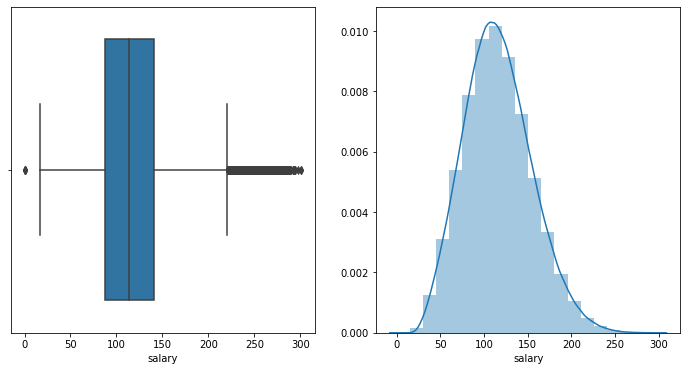

In [131]:
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(trainDF.salary)
plt.subplot(1, 2, 2)
sns.distplot(trainDF.salary, bins=20)
plt.show()

###### Use IQR rule to identify potential outliers

More on IQR at: https://medium.com/@TheNewStat1/interquartile-range-iqr-ad671d9476d4

In [132]:
stat = trainDF.salary.describe()
print(stat)
IQR = stat['75%'] - stat['25%']
print(IQR)
upper = stat['75%'] + 1.5 * IQR
lower = stat['25%'] - 1.5 * IQR
print('The upper and lower bounds for the suspected bounds are {} and {} respectively.'.format(upper, lower))


count    1000000.000000
mean         116.061818
std           38.717936
min            0.000000
25%           88.000000
50%          114.000000
75%          141.000000
max          301.000000
Name: salary, dtype: float64
53.0
The upper and lower bounds for the suspected bounds are 220.5 and 8.5 respectively.


In [133]:
# Checking for potential outliers below the lower bound.
trainDF[trainDF.salary < 8.5]
trainDF.loc[trainDF.salary < lower]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0.0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0.0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0.0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0.0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0.0


In [134]:
trainDF.shape

(1000000, 9)

In [135]:
# Dropping these lower (zero) salaries since they don't add anything to our model.
trainDF = trainDF[trainDF['salary'] > lower]

In [136]:
# Check to see if rows above were dropped
trainDF.shape

(999995, 9)

In [137]:
# Checking for potential outliers above the upper bound. 

trainDF.loc[trainDF.salary > 222.5, 'jobType'].value_counts()

CEO               2893
CFO               1308
CTO               1298
VICE_PRESIDENT     520
MANAGER            188
SENIOR              50
JUNIOR              16
Name: jobType, dtype: int64

In [138]:
# Checking for the most suspicious outliers above upper bound.

trainDF[(trainDF.salary > 222.5) & (trainDF.jobType == 'JUNIOR')]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
1222,JOB1362684408909,COMP40,JUNIOR,MASTERS,COMPSCI,OIL,24,5,225.0
27710,JOB1362684435397,COMP21,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,3,246.0
31355,JOB1362684439042,COMP45,JUNIOR,DOCTORAL,COMPSCI,FINANCE,24,0,225.0
100042,JOB1362684507729,COMP17,JUNIOR,DOCTORAL,BUSINESS,FINANCE,23,8,248.0
160333,JOB1362684568020,COMP18,JUNIOR,DOCTORAL,BUSINESS,FINANCE,22,3,223.0
303778,JOB1362684711465,COMP51,JUNIOR,MASTERS,ENGINEERING,WEB,24,2,226.0
348354,JOB1362684756041,COMP56,JUNIOR,DOCTORAL,ENGINEERING,OIL,23,25,226.0
500739,JOB1362684908426,COMP40,JUNIOR,DOCTORAL,ENGINEERING,OIL,21,0,227.0
627534,JOB1362685035221,COMP5,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,29,230.0
645555,JOB1362685053242,COMP36,JUNIOR,DOCTORAL,BUSINESS,FINANCE,24,1,225.0


In [139]:
# Junior salaries over the 75% percentile are rare (16 out of 1mil), but they could occur. 
# Therefore, these outliers are acceptible. 

In [140]:
# Value_counts gives you how many features of a column from a variable of type object.
trainDF['jobType'].value_counts()

SENIOR            125886
VICE_PRESIDENT    125234
MANAGER           125120
CTO               125045
JANITOR           124971
CEO               124778
JUNIOR            124592
CFO               124369
Name: jobType, dtype: int64

In [141]:
# Visualize correlation between variables of type number.

trainDF[['yearsExperience', 'milesFromMetropolis', 'salary']].corr()

,yearsExperience,milesFromMetropolis,salary
yearsExperience,1.000000,0.000672,0.375013
milesFromMetropolis,0.000672,1.000000,-0.297686
salary,0.375013,-0.297686,1.000000


In [142]:
# Function that creates plots to eplore the feature variables
def plotFeats(trainDF, var): 
    '''
    produce plot for each features
    plot1(left), the distribution of samples on the feature
    plot2(right), the dependance of salary on the feature
    '''
    plt.figure(figsize = (17, 4))
    plt.subplot(1, 2, 1)
    if trainDF[var].dtype == 'int64':
        plt.hist(trainDF[var], bins=5)
    else:
        # change the object datatype of each variable to category /n
        # type and order their level by the mean salary
        mean = trainDF.groupby(var)["salary"].mean()
        trainDF[var] = trainDF[var].astype('category')
        level = mean.sort_values().index.tolist()
        trainDF[var].cat.reorder_categories(level, inplace=True)
        trainDF[var].value_counts().plot(kind='bar')   
    plt.xticks(rotation=45, size=8)
    plt.xlabel(var)
    plt.ylabel('Count')
    
    plt.subplot(1, 2, 2)
    # There are many different companyIds so its better to visualize with a line graph
    if trainDF[var].dtype == 'int64' or var == "companyId": 
        # Plot the mean salary for each category and shade the line /n
        # between the (mean - std, mean + std)
        mean = trainDF.groupby(var)["salary"].mean()
        std = trainDF.groupby(var)["salary"].std()
        mean.plot()
        plt.fill_between(range(len(std.index)), mean.values-std.values, 
                         mean.values + std.values,alpha = 0.1)
    else:
        sns.boxplot(x= var, y="salary", data= trainDF)
    
    plt.xticks(rotation=45)
    plt.ylabel('Salary')
    plt.show()

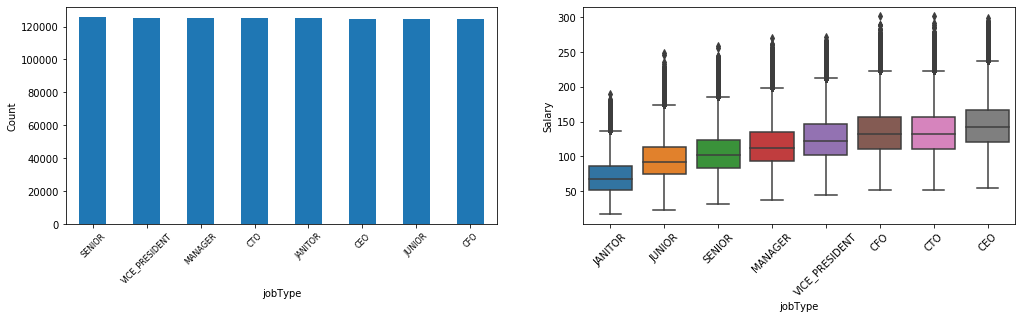

In [143]:
# The below code was used to sort and plot prior to completing the function above.

#sorted_list = trainDF.groupby('jobType')['salary'].median().sort_values(ascending=False).index
#boxPlotGraph = sns.boxplot(x="jobType", y="salary", data=trainDF, order=sorted_list)
#plt.xticks(rotation=60)
#plt.figure(figsize = (20, 20))

plotFeats(trainDF, 'jobType')

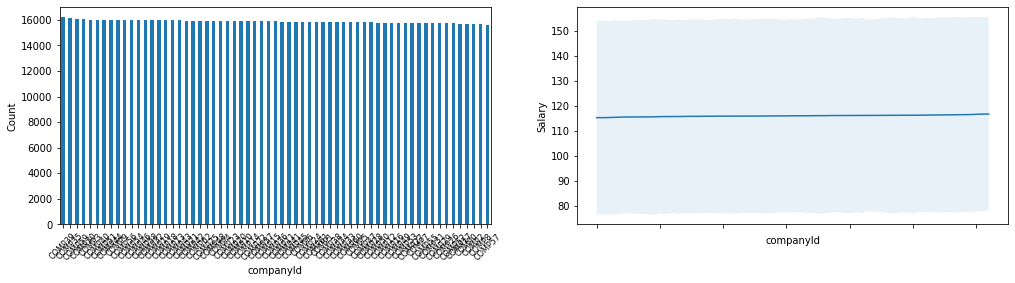

In [144]:
plotFeats(trainDF, 'companyId')

<Figure size 1440x1440 with 0 Axes>

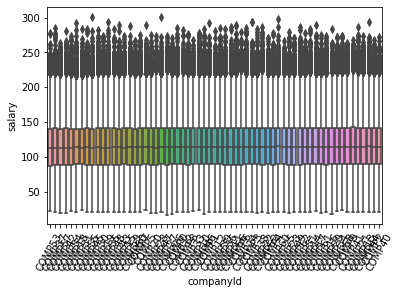

<Figure size 1440x1440 with 0 Axes>

In [145]:
# Company Id looks a bit cluttered, but it's still visible that it's a poor predictor of salary, /n
# since it shows a straight horizontal line across all features.
# Here's another companyId visualization.

boxPlotGraph = sns.boxplot(x="companyId", y="salary", data=trainDF, order=None)
plt.xticks(rotation=60)
plt.figure(figsize = (20, 20))

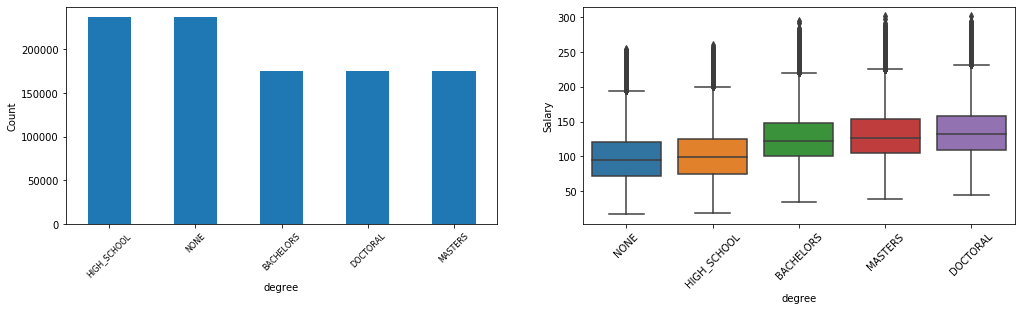

In [146]:
plotFeats(trainDF, 'degree')

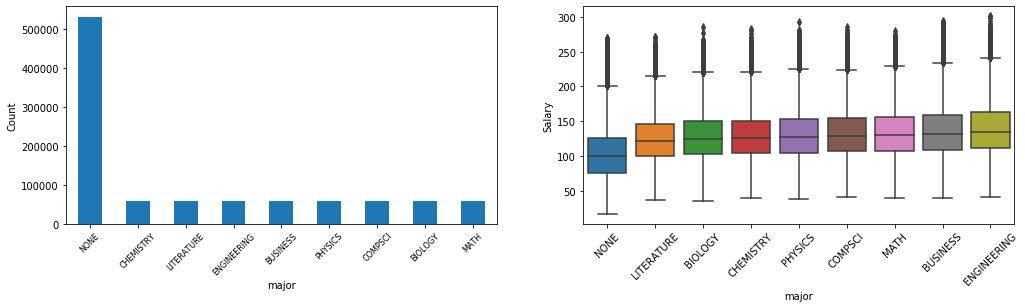

In [147]:
plotFeats(trainDF, 'major')

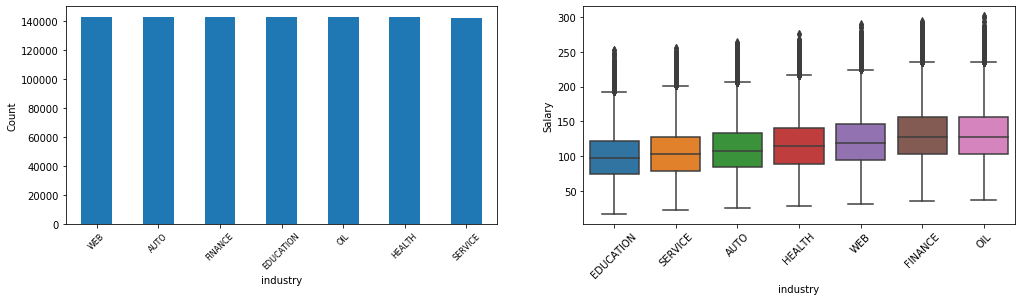

In [148]:
plotFeats(trainDF, 'industry')

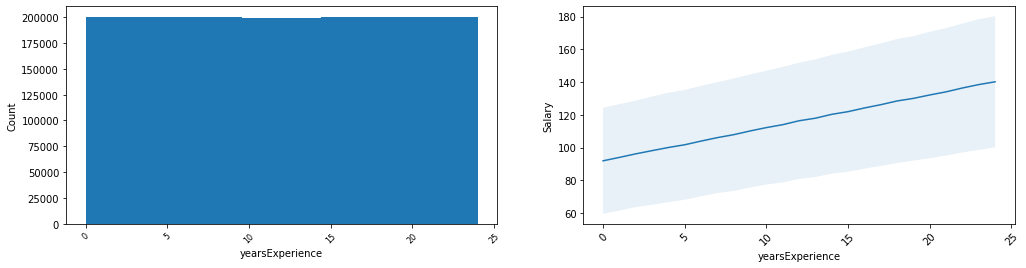

In [149]:
plotFeats(trainDF, 'yearsExperience')

<Figure size 1440x1440 with 0 Axes>

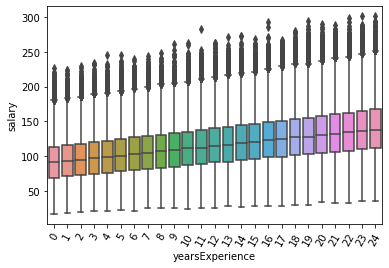

<Figure size 1440x1440 with 0 Axes>

In [150]:
# Years of experience has a nice, clear correlation with salary. /n
# It's a progressive line showing the higher the years of experience, the higher the salary.

boxPlotGraph = sns.boxplot(x="yearsExperience", y="salary", data=trainDF)
plt.xticks(rotation=60)
plt.figure(figsize = (20, 20))

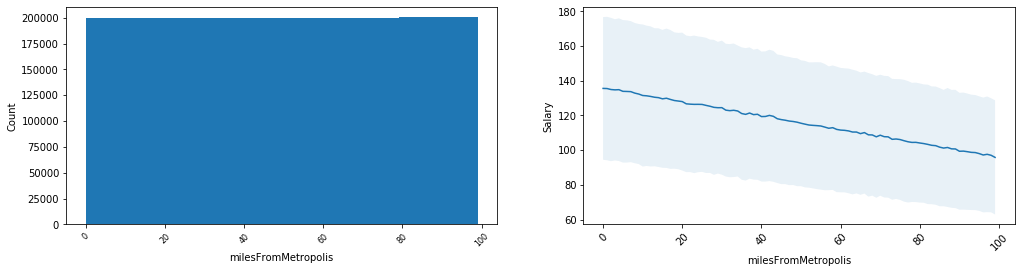

In [151]:
plotFeats(trainDF, 'milesFromMetropolis')

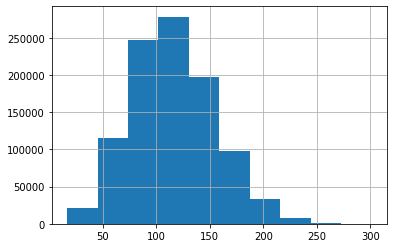

In [152]:
# Looks like the salary mean is around 100-105. 

trainDF.salary.hist() #add or remove ';' at the end for a small difference?

In [153]:
# Encoding categorical data in a dataframe.
def EncodeData(trainDF):    
    for col in trainDF.columns:
        if trainDF[col].dtype.name == 'category':
            le = LabelEncoder()
            trainDF[col] = le.fit_transform(trainDF[col])
    return trainDF

In [154]:
# Create copy of dataframe and encode the categorical data.
baselineDF = trainDF.copy()
baselineDF = EncodeData(baselineDF)

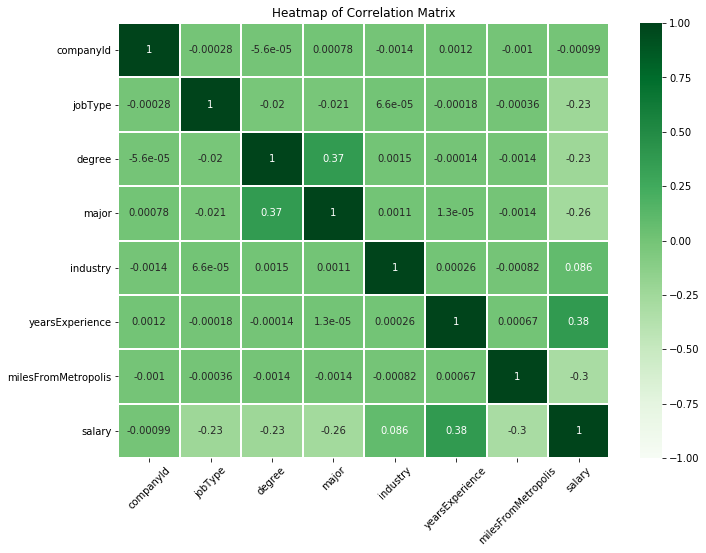

In [155]:
# Plot Seaborn heatmap to visualize correlation between variables.
plt.figure(figsize = (11, 8))
corr = baselineDF.corr()
sns.heatmap(corr,
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values,cmap = "Greens", vmin=-1, vmax=1, annot=True, linewidths=1)
plt.title('Heatmap of Correlation Matrix')
plt.xticks(rotation=45)
plt.show()

###### Based on the plotted heatmap, the strongest correlators are YoE and miles from metropolis.
<br>
We also see no collinearity between features, as well as companyId having near zero correlation with salary, so we could consider dropping it after the baseline model executes.

### ---- 5 Establish a baseline ----

In [156]:
#select a reasonable metric (MSE in this case)
#e.g. use "average salary" for each industry as your model and then measure MSE
#during 5-fold cross-validation

In [157]:
baselineDF.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis', 'salary'],
      dtype='object')

In [158]:
# Splitting features and targets
featuresBaseline = baselineDF[['companyId', 'jobType', 'degree', 'major', 'industry',
                            'yearsExperience', 'milesFromMetropolis', 'salary']]
targetsBaseline = baselineDF[['salary']]
# (optional)
# del baselineDF

In [160]:
# Creating an extremely simple model and measure its efficacy.
lr = LinearRegression()
baselineLR_mse = cross_val_score(lr, featuresBaseline, targetsBaseline, scoring 
                                  = 'neg_mean_squared_error')
baselineLR_mse = -1*baselineLR_mse.mean()
print("Baseline MSE Score: ", baselineLR_mse)

#'''In this case, MSE (mean squared error) is the best metric to measure the efficacy /n
#    because the prediction here is on salaries, which are numerical in nature. '''
# groupy for each industry and get the error from that. 
# Write MSE algorithm? Not here. See Part 3 - Develop. 

Baseline MSE Score:  5.659248084649311e-26


### ---- 6 Hypothesize solution ----

In [161]:
# Brainstorming 3 models that may improve results over the baseline model.

In [162]:
''' Choose about 3 models based on the EDA that you think will be effective. '''

' Choose about 3 models based on the EDA that you think will be effective. '

Brainstorm 3 models that you think may improve results over the baseline model based on your EDA and explain why they're reasonable solutions here.

Also write down any new features that you think you should try adding to the model based on your EDA, e.g. interaction variables, summary statistics for each group, etc

## Part 3 - DEVELOP

You will cycle through creating features, tuning models, and training/validing models (steps 7-9) until you've reached your efficacy goal

#### Your metric will be MSE and your goal is:
 - <360 for entry-level data science roles
 - <320 for senior data science roles

### ---- 7 Engineer features  ----

In [163]:
#make sure that data is ready for modeling
#create any new features needed to potentially enhance model

In [164]:
# One hot encoding, create new features if needed. Tune models as shown below.

categoryDF = trainDF[['jobType', 'degree', 'major', 'industry']]
categoryDF = pd.get_dummies(categoryDF, drop_first=True)

In [165]:
categoryDF.shape

(999995, 25)

In [166]:
# Normalizing values between 0 and 1 using Min/Max Scaler.

normalDF = trainDF[['yearsExperience', 'milesFromMetropolis']]
cols = normalDF.columns
normalDF = MinMaxScaler().fit_transform(normalDF)
normalDF = pd.DataFrame(normalDF, columns = cols)

In [167]:
# Merging (concat) the converted categorical and numerical variables.

featuresDF = pd.concat([categoryDF.reset_index(drop=True), normalDF], axis=1)
targetsDF = trainDF[['salary']]
#del categoryDF, normalDF

In [168]:
featuresDF.shape

(999995, 27)

### ---- 8 Create models ----

In [169]:
#create and tune the models that you brainstormed during part 2

In [170]:
# Utilizing 5 Fold - Cross Validation (CV) of each model.

def evalModel(model):
    negMse = cross_val_score(model, featuresDF, targetsDF.values.ravel(), scoring
                            = 'neg_mean_squared_error')
    mse = -1 * negMse
    stdMse = round(mse.std(), 2)
    meanMse = round(mse.mean(), 2)
    print('\nModel:\n', model)
    print('    Standard Deviation of Cross Validation MSEs:\n     ', stdMse)
    print('    Mean 5-Fold Cross Validation MSE: \n      ', meanMse)
    return meanMse

### ---- 9 Test models ----

In [171]:
# Running 5-fold cross validation on models and measuring MSE

###### Warning.

###### Warning!

###### WARNING!

Friendly reminder: the next cells take 30-60+ minutes (each) to run. Make sure to save this notebook and push/commit to Git for version control as a precautionary step. :)

In [178]:
# Looping through different models to obtain their MSE. Hyperparameters chosen manually (testing).

models = []
meanMse = {}

lr = LinearRegression()

sgd = SGDRegressor(max_iter=200, learning_rate='optimal')

dtr = DecisionTreeRegressor(max_depth=15)

rfr = RandomForestRegressor(n_estimators=150, n_jobs=-1, max_depth=30, 
                            min_samples_split=60, max_features='sqrt')
xgb = xgboost.XGBRegressor(max_depth=5, n_estimators=500, learning_rate=0.1, n_jobs=-1)

models.extend([lr, sgd, dtr, rfr, xgb])

print('Cross Validation of Models Initiated...\n')

for model in models:
    mseIter = evalModel(model)
    meanMse.update({model:mseIter})
    
bestModel = min(meanMse, key=meanMse.get)

print('\n\nThe model with the lowest average MSE to use for predictions is:\n')
print(bestModel)

Cross Validation of Models Initiated...


Model:
 LinearRegression()
    Standard Deviation of Cross Validation MSEs:
      1.78
    Mean 5-Fold Cross Validation MSE: 
       384.41

Model:
 SGDRegressor(learning_rate='optimal', max_iter=200)
    Standard Deviation of Cross Validation MSEs:
      1.83
    Mean 5-Fold Cross Validation MSE: 
       384.55

Model:
 DecisionTreeRegressor(max_depth=15)
    Standard Deviation of Cross Validation MSEs:
      1.9
    Mean 5-Fold Cross Validation MSE: 
       433.16

Model:
 RandomForestRegressor(max_depth=30, max_features='sqrt', min_samples_split=60,
                      n_estimators=150, n_jobs=-1)
    Standard Deviation of Cross Validation MSEs:
      1.69
    Mean 5-Fold Cross Validation MSE: 
       372.27

Model:
 XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
       

In [179]:
# Creating a pandas dataframe from the meanMse dictionary.
modelsDF = pd.DataFrame.from_dict(data = meanMse, orient='index', columns=['MSE-Score'])
modelsDF.index = ['LR', 'SDG', 'DTR', 'RF', 'XGB']
modelsDF

,MSE-Score
LR,384.41
SDG,384.55
DTR,433.16
RF,372.27
XGB,356.62


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

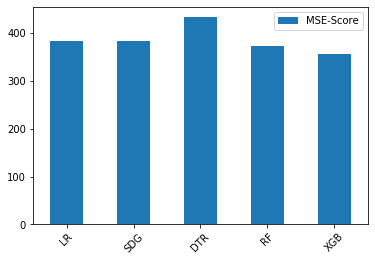

In [180]:
# Visualizing the accuracy results.
modelsDF.plot(kind='bar')
plt.xticks(rotation=45)

### ---- 10 Select best model  ----

###### Selecting the model with the lowest error as the "production" model \n
As we see above, XGB has the smallest MSE. Now, we'll fine tune it. 


In [181]:
trainX, testX, trainY, testY = train_test_split(featuresDF, targetsDF, 
                                                random_state=36, test_size=0.2)

In [189]:
# Creating an array below to store the results, and a watchlist to keep track of performance.
results = []

eval_set = [(trainX, trainY), (testX, testY)]

In [183]:
# Checking hyperparameters.

print(inspect.signature(xgboost.XGBRegressor))

(objective='reg:squarederror', **kwargs)


In [191]:
results = [] # resets it.

# Enumerating through different n_estimators values and storing results.

for n_estimators in [100, 150, 250, 500, 750, 1000]:
    clf = xgboost.XGBRegressor(max_depth=5, learning_rate=0.1, n_estimators
                               =n_estimators, n_jobs=-1)
    clf.fit(trainX, trainY, eval_set = eval_set, verbose=False)
    results.append(
        {
            'n_estimators': n_estimators, 
            'train_error': metrics.mean_squared_error(trainY, clf.predict(trainX)),
            'test_error': metrics.mean_squared_error(testY, clf.predict(testX))
        })

# Showing results
nEstimatorsLr = pd.DataFrame(results).set_index('n_estimators').sort_index()
nEstimatorsLr

,train_error,test_error
n_estimators,,
100,371.127086,370.351965
150,360.342180,360.007623
250,355.473944,355.823650
500,352.485315,354.533156
750,350.818615,354.412795
1000,349.442958,354.417789


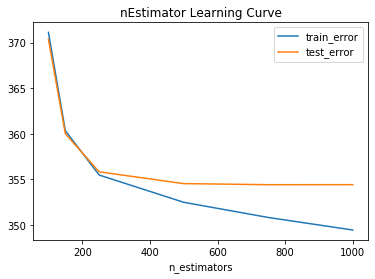

In [193]:
# Visualizing the n_estimator learning curve. 
nEstimatorsLr.plot(title='nEstimator Learning Curve')

###### What does this Learning Curve tells us?
The train error tends to go to zero as it exhausts all features in the dataset. The test however, plateaus at about 500, so optimally that's what we should use.

In [194]:
results = [] # resets it again.

# Enumerating different max_depth values and storing results.

for max_depth in [3, 4, 5, 6, 8, 10]:
    clf = xgboost.XGBRegressor(max_depth = max_depth, n_estimators = 750, learning_rate 
                              = 0.1, n_jobs=-1)
    clf.fit(trainX, trainY, eval_set = eval_set, verbose = False)
    results.append(
        {
            'max_depth': max_depth,
            'train_error': metrics.mean_squared_error(trainY, clf.predict(trainX)),
            'test_error': metrics.mean_squared_error(testY, clf.predict(testX))
        })

# Displaying results.
maxDepthLr = pd.DataFrame(results).set_index('max_depth').sort_index()
maxDepthLr

,train_error,test_error
max_depth,,
3,355.795346,354.367711
4,354.073766,354.009156
5,350.818615,354.412795
6,345.139602,355.553698
8,318.314143,361.335433
10,260.970582,376.796722


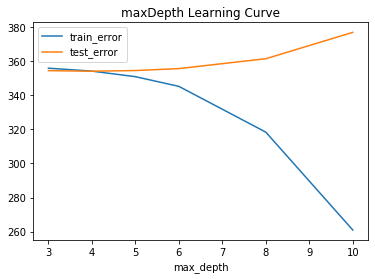

In [195]:
# Visualizing the maxDepth learning curve. 
maxDepthLr.plot(title='maxDepth Learning Curve')

###### What does the Max Depth Learning Curve tells us?
The optimal value for maxDepth is around 4 and n_estimators is 750, while learning_rate is 0.1.
After that point we see the test error curve increase. 

In [196]:
results = [] # resetting the array again. 

# Enumerating through different learning_rate values and storing results.
for learning_rate in [0.05, 0.1, 0.2, 0.3]:
    clf = xgboost.XGBRegressor(max_depth=4, learning_rate=learning_rate, n_estimators=750, n_jobs=-1)
    clf.fit(trainX, trainY, eval_set=eval_set, verbose=False)
    results.append(
        {
            'learning_rate': learning_rate,
            'train_error': metrics.mean_squared_error(trainY, clf.predict(trainX)),
            'test_error': metrics.mean_squared_error(testY, clf.predict(testX))
        })
    
# Displaying Results  
learningRateLr = pd.DataFrame(results).set_index('learning_rate').sort_index()
learningRateLr

,train_error,test_error
learning_rate,,
0.05,355.565790,354.624322
0.10,354.073766,354.009156
0.20,352.762697,354.413865
0.30,351.212361,354.194263


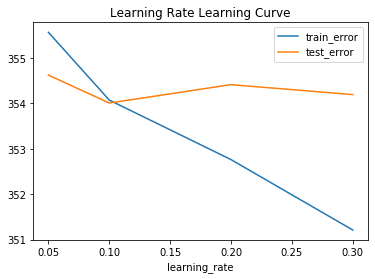

In [197]:
# Visualizing the Learnin Rate learning curve. 
learningRateLr.plot(title='Learning Rate Learning Curve')

###### What does the Learning Rate learning curve tells us?
The optimal learning_rate value could be between 0.05 and 0.10 while max_depth=4 and n_estimators=750. The model with learning_rate=0.05 may have been unable to converge, therefore we will explore early stopping with this learning rate.

In [198]:
# Saving the best hyperparameter setting.
bestModel = xgboost.XGBRegressor(learning_rate=0.05, max_depth=4, n_estimators=2000, n_jobs=-1)

In [199]:
# Fitting the training set and applying early stopping.
bestModel.fit(trainX, trainY, early_stopping_rounds=10, eval_set=eval_set, verbose=True)

[0]	validation_0-rmse:116.21744	validation_1-rmse:116.15193
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:110.82274	validation_1-rmse:110.77539
[2]	validation_0-rmse:105.73261	validation_1-rmse:105.68675
[3]	validation_0-rmse:100.90406	validation_1-rmse:100.86514
[4]	validation_0-rmse:96.36352	validation_1-rmse:96.30730
[5]	validation_0-rmse:92.03447	validation_1-rmse:91.98828
[6]	validation_0-rmse:87.95617	validation_1-rmse:87.90863
[7]	validation_0-rmse:84.08439	validation_1-rmse:84.04493
[8]	validation_0-rmse:80.43870	validation_1-rmse:80.39296
[9]	validation_0-rmse:76.97772	validation_1-rmse:76.92821
[10]	validation_0-rmse:73.71873	validation_1-rmse:73.67345
[11]	validation_0-rmse:70.62183	validation_1-rmse:70.57925
[12]	validation_0-rmse:67.71689	validation_1-rmse:67.67374
[13]	validation_0-rmse:64.97330	validation_1-rmse:64.93324
[14]	validation_0

[136]	validation_0-rmse:20.62426	validation_1-rmse:20.57976
[137]	validation_0-rmse:20.60963	validation_1-rmse:20.56504
[138]	validation_0-rmse:20.59024	validation_1-rmse:20.54538
[139]	validation_0-rmse:20.57721	validation_1-rmse:20.53245
[140]	validation_0-rmse:20.55685	validation_1-rmse:20.51140
[141]	validation_0-rmse:20.53632	validation_1-rmse:20.49091
[142]	validation_0-rmse:20.52026	validation_1-rmse:20.47513
[143]	validation_0-rmse:20.50753	validation_1-rmse:20.46265
[144]	validation_0-rmse:20.49188	validation_1-rmse:20.44737
[145]	validation_0-rmse:20.47230	validation_1-rmse:20.42802
[146]	validation_0-rmse:20.45845	validation_1-rmse:20.41412
[147]	validation_0-rmse:20.44012	validation_1-rmse:20.39607
[148]	validation_0-rmse:20.42687	validation_1-rmse:20.38293
[149]	validation_0-rmse:20.40793	validation_1-rmse:20.36420
[150]	validation_0-rmse:20.38968	validation_1-rmse:20.34640
[151]	validation_0-rmse:20.37274	validation_1-rmse:20.32864
[152]	validation_0-rmse:20.36037	validat

[273]	validation_0-rmse:19.38820	validation_1-rmse:19.34936
[274]	validation_0-rmse:19.38393	validation_1-rmse:19.34545
[275]	validation_0-rmse:19.37972	validation_1-rmse:19.34102
[276]	validation_0-rmse:19.37529	validation_1-rmse:19.33695
[277]	validation_0-rmse:19.37119	validation_1-rmse:19.33275
[278]	validation_0-rmse:19.36675	validation_1-rmse:19.32824
[279]	validation_0-rmse:19.36204	validation_1-rmse:19.32357
[280]	validation_0-rmse:19.35810	validation_1-rmse:19.31973
[281]	validation_0-rmse:19.35488	validation_1-rmse:19.31638
[282]	validation_0-rmse:19.35225	validation_1-rmse:19.31387
[283]	validation_0-rmse:19.34839	validation_1-rmse:19.31035
[284]	validation_0-rmse:19.34477	validation_1-rmse:19.30646
[285]	validation_0-rmse:19.33985	validation_1-rmse:19.30162
[286]	validation_0-rmse:19.33614	validation_1-rmse:19.29793
[287]	validation_0-rmse:19.33357	validation_1-rmse:19.29551
[288]	validation_0-rmse:19.32986	validation_1-rmse:19.29170
[289]	validation_0-rmse:19.32619	validat

[410]	validation_0-rmse:19.03535	validation_1-rmse:19.00166
[411]	validation_0-rmse:19.03244	validation_1-rmse:18.99891
[412]	validation_0-rmse:19.03134	validation_1-rmse:18.99799
[413]	validation_0-rmse:19.03008	validation_1-rmse:18.99666
[414]	validation_0-rmse:19.02871	validation_1-rmse:18.99534
[415]	validation_0-rmse:19.02614	validation_1-rmse:18.99256
[416]	validation_0-rmse:19.02461	validation_1-rmse:18.99120
[417]	validation_0-rmse:19.02395	validation_1-rmse:18.99043
[418]	validation_0-rmse:19.02327	validation_1-rmse:18.98975
[419]	validation_0-rmse:19.02175	validation_1-rmse:18.98842
[420]	validation_0-rmse:19.01914	validation_1-rmse:18.98614
[421]	validation_0-rmse:19.01796	validation_1-rmse:18.98503
[422]	validation_0-rmse:19.01677	validation_1-rmse:18.98373
[423]	validation_0-rmse:19.01482	validation_1-rmse:18.98192
[424]	validation_0-rmse:19.01357	validation_1-rmse:18.98080
[425]	validation_0-rmse:19.01238	validation_1-rmse:18.97959
[426]	validation_0-rmse:19.01115	validat

[547]	validation_0-rmse:18.91167	validation_1-rmse:18.88343
[548]	validation_0-rmse:18.91091	validation_1-rmse:18.88257
[549]	validation_0-rmse:18.91054	validation_1-rmse:18.88231
[550]	validation_0-rmse:18.91014	validation_1-rmse:18.88188
[551]	validation_0-rmse:18.90973	validation_1-rmse:18.88152
[552]	validation_0-rmse:18.90909	validation_1-rmse:18.88085
[553]	validation_0-rmse:18.90880	validation_1-rmse:18.88060
[554]	validation_0-rmse:18.90837	validation_1-rmse:18.88021
[555]	validation_0-rmse:18.90776	validation_1-rmse:18.87953
[556]	validation_0-rmse:18.90742	validation_1-rmse:18.87914
[557]	validation_0-rmse:18.90691	validation_1-rmse:18.87884
[558]	validation_0-rmse:18.90646	validation_1-rmse:18.87842
[559]	validation_0-rmse:18.90590	validation_1-rmse:18.87795
[560]	validation_0-rmse:18.90559	validation_1-rmse:18.87774
[561]	validation_0-rmse:18.90521	validation_1-rmse:18.87735
[562]	validation_0-rmse:18.90463	validation_1-rmse:18.87683
[563]	validation_0-rmse:18.90408	validat

[684]	validation_0-rmse:18.86617	validation_1-rmse:18.84209
[685]	validation_0-rmse:18.86595	validation_1-rmse:18.84167
[686]	validation_0-rmse:18.86577	validation_1-rmse:18.84159
[687]	validation_0-rmse:18.86552	validation_1-rmse:18.84139
[688]	validation_0-rmse:18.86525	validation_1-rmse:18.84127
[689]	validation_0-rmse:18.86503	validation_1-rmse:18.84101
[690]	validation_0-rmse:18.86493	validation_1-rmse:18.84088
[691]	validation_0-rmse:18.86461	validation_1-rmse:18.84061
[692]	validation_0-rmse:18.86441	validation_1-rmse:18.84043
[693]	validation_0-rmse:18.86409	validation_1-rmse:18.84020
[694]	validation_0-rmse:18.86390	validation_1-rmse:18.84009
[695]	validation_0-rmse:18.86380	validation_1-rmse:18.83997
[696]	validation_0-rmse:18.86349	validation_1-rmse:18.83959
[697]	validation_0-rmse:18.86327	validation_1-rmse:18.83950
[698]	validation_0-rmse:18.86309	validation_1-rmse:18.83941
[699]	validation_0-rmse:18.86294	validation_1-rmse:18.83916
[700]	validation_0-rmse:18.86260	validat

[821]	validation_0-rmse:18.84333	validation_1-rmse:18.82297
[822]	validation_0-rmse:18.84318	validation_1-rmse:18.82294
[823]	validation_0-rmse:18.84308	validation_1-rmse:18.82287
[824]	validation_0-rmse:18.84290	validation_1-rmse:18.82286
[825]	validation_0-rmse:18.84272	validation_1-rmse:18.82284
[826]	validation_0-rmse:18.84262	validation_1-rmse:18.82263
[827]	validation_0-rmse:18.84260	validation_1-rmse:18.82259
[828]	validation_0-rmse:18.84243	validation_1-rmse:18.82246
[829]	validation_0-rmse:18.84226	validation_1-rmse:18.82246
[830]	validation_0-rmse:18.84214	validation_1-rmse:18.82228
[831]	validation_0-rmse:18.84202	validation_1-rmse:18.82219
[832]	validation_0-rmse:18.84193	validation_1-rmse:18.82212
[833]	validation_0-rmse:18.84179	validation_1-rmse:18.82191
[834]	validation_0-rmse:18.84174	validation_1-rmse:18.82191
[835]	validation_0-rmse:18.84158	validation_1-rmse:18.82184
[836]	validation_0-rmse:18.84153	validation_1-rmse:18.82188
[837]	validation_0-rmse:18.84141	validat

[958]	validation_0-rmse:18.82931	validation_1-rmse:18.81441
[959]	validation_0-rmse:18.82919	validation_1-rmse:18.81437
[960]	validation_0-rmse:18.82911	validation_1-rmse:18.81433
[961]	validation_0-rmse:18.82908	validation_1-rmse:18.81431
[962]	validation_0-rmse:18.82906	validation_1-rmse:18.81426
[963]	validation_0-rmse:18.82896	validation_1-rmse:18.81417
[964]	validation_0-rmse:18.82887	validation_1-rmse:18.81409
[965]	validation_0-rmse:18.82884	validation_1-rmse:18.81409
[966]	validation_0-rmse:18.82866	validation_1-rmse:18.81402
[967]	validation_0-rmse:18.82861	validation_1-rmse:18.81393
[968]	validation_0-rmse:18.82852	validation_1-rmse:18.81389
[969]	validation_0-rmse:18.82838	validation_1-rmse:18.81387
[970]	validation_0-rmse:18.82834	validation_1-rmse:18.81377
[971]	validation_0-rmse:18.82825	validation_1-rmse:18.81375
[972]	validation_0-rmse:18.82820	validation_1-rmse:18.81374
[973]	validation_0-rmse:18.82809	validation_1-rmse:18.81375
[974]	validation_0-rmse:18.82803	validat

[1093]	validation_0-rmse:18.81838	validation_1-rmse:18.80840
[1094]	validation_0-rmse:18.81835	validation_1-rmse:18.80840
[1095]	validation_0-rmse:18.81830	validation_1-rmse:18.80842
[1096]	validation_0-rmse:18.81829	validation_1-rmse:18.80840
[1097]	validation_0-rmse:18.81815	validation_1-rmse:18.80837
[1098]	validation_0-rmse:18.81803	validation_1-rmse:18.80830
[1099]	validation_0-rmse:18.81800	validation_1-rmse:18.80829
[1100]	validation_0-rmse:18.81788	validation_1-rmse:18.80827
[1101]	validation_0-rmse:18.81780	validation_1-rmse:18.80822
[1102]	validation_0-rmse:18.81777	validation_1-rmse:18.80821
[1103]	validation_0-rmse:18.81770	validation_1-rmse:18.80820
[1104]	validation_0-rmse:18.81768	validation_1-rmse:18.80810
[1105]	validation_0-rmse:18.81765	validation_1-rmse:18.80808
[1106]	validation_0-rmse:18.81756	validation_1-rmse:18.80801
[1107]	validation_0-rmse:18.81742	validation_1-rmse:18.80801
[1108]	validation_0-rmse:18.81746	validation_1-rmse:18.80801
[1109]	validation_0-rmse

[1228]	validation_0-rmse:18.81003	validation_1-rmse:18.80524
[1229]	validation_0-rmse:18.80991	validation_1-rmse:18.80525
[1230]	validation_0-rmse:18.80986	validation_1-rmse:18.80528
[1231]	validation_0-rmse:18.80980	validation_1-rmse:18.80527
[1232]	validation_0-rmse:18.80978	validation_1-rmse:18.80521
[1233]	validation_0-rmse:18.80975	validation_1-rmse:18.80521
[1234]	validation_0-rmse:18.80970	validation_1-rmse:18.80517
[1235]	validation_0-rmse:18.80961	validation_1-rmse:18.80520
[1236]	validation_0-rmse:18.80960	validation_1-rmse:18.80515
[1237]	validation_0-rmse:18.80955	validation_1-rmse:18.80517
[1238]	validation_0-rmse:18.80950	validation_1-rmse:18.80514
[1239]	validation_0-rmse:18.80945	validation_1-rmse:18.80514
[1240]	validation_0-rmse:18.80941	validation_1-rmse:18.80511
[1241]	validation_0-rmse:18.80932	validation_1-rmse:18.80502
[1242]	validation_0-rmse:18.80924	validation_1-rmse:18.80504
[1243]	validation_0-rmse:18.80923	validation_1-rmse:18.80508
[1244]	validation_0-rmse

[1363]	validation_0-rmse:18.80297	validation_1-rmse:18.80292
[1364]	validation_0-rmse:18.80288	validation_1-rmse:18.80290
[1365]	validation_0-rmse:18.80289	validation_1-rmse:18.80284
[1366]	validation_0-rmse:18.80285	validation_1-rmse:18.80287
[1367]	validation_0-rmse:18.80283	validation_1-rmse:18.80280
[1368]	validation_0-rmse:18.80279	validation_1-rmse:18.80275
[1369]	validation_0-rmse:18.80269	validation_1-rmse:18.80277
[1370]	validation_0-rmse:18.80266	validation_1-rmse:18.80273
[1371]	validation_0-rmse:18.80258	validation_1-rmse:18.80279
[1372]	validation_0-rmse:18.80254	validation_1-rmse:18.80282
[1373]	validation_0-rmse:18.80258	validation_1-rmse:18.80280
[1374]	validation_0-rmse:18.80251	validation_1-rmse:18.80279
[1375]	validation_0-rmse:18.80243	validation_1-rmse:18.80277
[1376]	validation_0-rmse:18.80236	validation_1-rmse:18.80277
[1377]	validation_0-rmse:18.80238	validation_1-rmse:18.80274
[1378]	validation_0-rmse:18.80230	validation_1-rmse:18.80275
[1379]	validation_0-rmse

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=4,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=2000, n_jobs=-1, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [200]:
# Saving the best hyperparameter setting with n_estimators from early stopping.
bestModel = xgboost.XGBRegressor(learning_rate=0.05, max_depth=4, n_estimators=1500, n_jobs=-1)

In [202]:
# Running the model in the same way as the intial test to see improvement of MSE.
evalModel(bestModel)


Model:
 XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=0.05, max_delta_step=None, max_depth=4,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1500, n_jobs=-1, num_parallel_tree=None,
             random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None)
    Standard Deviation of Cross Validation MSEs:
      1.37
    Mean 5-Fold Cross Validation MSE: 
       355.62


355.62

###### Conclusion
While the model has not improved by much after some fine-tuning, these new hyperparameters will still be utilized for deployment.

## Part 4 - DEPLOY

### ---- 11 Automate pipeline ----

In [203]:
#write script that trains model on entire training set, saves model to disk,
#and scores the "test" dataset

In [204]:
# Creating a function that trains model on entire training set and saves the model to disk.

def trainedCleanModelDF(raw_train_features, raw_train_targets):
    
    # Loading csv files
    featuresDF = pd.read_csv(raw_train_features)
    targetsDF = pd.read_csv(raw_train_targets) 

    # Cleaning feature and target dataframes per analysis above
    df = pd.merge(featuresDF, targetsDF, on='jobId')
    df = df[df['salary'] > 8.5]
    categoriesDF = df[['jobType', 'degree', 'major', 'industry']]
    categoriesDF = pd.get_dummies(categoriesDF, drop_first=True)
    featuresDF = pd.concat([categoriesDF, df[['yearsExperience', 'milesFromMetropolis']]], axis=1)
    targetsDF = df[['salary']]
    del categoriesDF, df
    
    # Implement best model discovered per analysis above
    model = xgboost.XGBRegressor(learning_rate=0.05, max_depth=4, n_estimators=1500)
    model.fit(featuresDF, targetsDF)
    
    # Save model to disk
    model_file = 'model'
    pickle.dump(model, open(model_file, 'wb'))
    
    # Informs user that process is complete
    print("Data prepraration and model creation complete.")

In [205]:
# Script that prepares data, predicts salaries, and exports results
# This class will be saved in a .py file for private use - See "Salary_Prediction_Module.py"
class salaryPredictionModel():
    
    # Read the 'model' file which was saved
    def __init__(self, model_file):
        self.xgb = pickle.load(open(model_file, 'rb'))
    
    # Takes data, prepares data, makes predictions from trained model, and exports results to csv file
    def exportPredictions(self, data_file):

        # Load csv file
        df_pred_features = pd.read_csv(data_file)
    
        # Saves jobId column for output file
        df_pred_jobId = pd.DataFrame(df_pred_features['jobId'])
    
        # Prepares data to be fed into the model
        df_pred_categories = df_pred_features[['jobType', 'degree', 'major', 'industry']]
        df_pred_categories = pd.get_dummies(df_pred_categories, drop_first=True)
        df_pred_features = pd.concat([df_pred_categories, df_pred_features[['yearsExperience','milesFromMetropolis']]], axis=1)
        del df_pred_categories
    
        # Loads model from disk, predicts salaries, and exports results to .csv file
        df_pred = pd.DataFrame(self.xgb.predict(df_pred_features))
        df_pred.columns = ['salary']
        df_pred = pd.concat([df_pred_jobId,df_pred], axis=1)
        df_pred.to_csv('predicted_salaries.csv')
        del df_pred_jobId
        
        # Informs user that process is complete
        print("Predictions exported to .csv file.")
    
    # Plot feature importance of model and save figure to .jpg file
    def exportFeatureImportance(self):
        fig, ax = plt.subplots(figsize=(12, 8))
        xgboost.plot_importance(self.xgb, height=0.6, ax=ax)
        fig.savefig('feature_importance.jpg')
    
        # Informs user that process is complete
        print("Feature importances exported to .jpg file.")

### ---- 12 Deploy solution ----

In [206]:
#save your prediction to a csv file or optionally save them as a table in a SQL database
#additionally, you want to save a visualization and summary of your prediction and feature \n
#importances these visualizations and summaries will be extremely useful to business stakeholders

In [207]:
# Use pipeline to prepare data, fit to model, and save to disk
trainedCleanModelDF("data/train_features.csv", "data/train_salaries.csv")


Data prepraration and model creation complete.


In [209]:
# Load and initialize the saved model
model = salaryPredictionModel('model')

In [211]:
# Prepare new data and export predictions to .csv file
model.exportPredictions("data/test_features.csv")

Predictions exported to .csv file.


Feature importances exported to .jpg file.


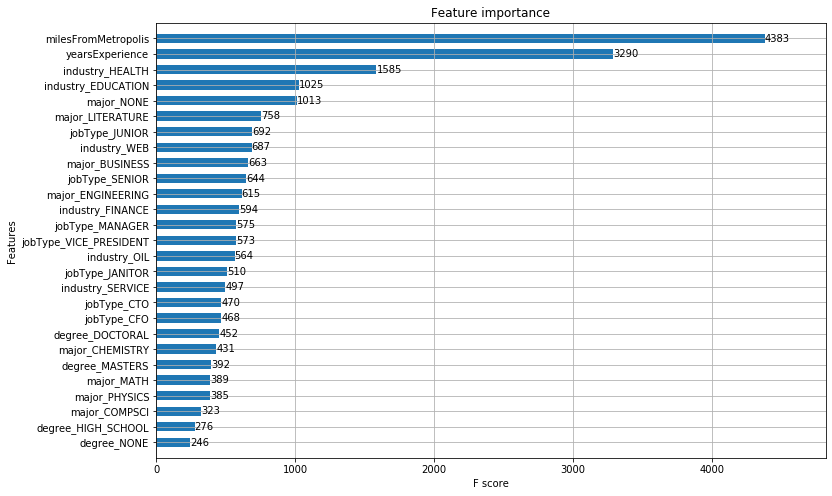

In [213]:
# Export feature importance chart
model.exportFeatureImportance()

### ---- 13 Measure efficacy ----
We'll skip this step since we don't have the outcomes for the test data

In [8]:
#Had to update conda to install package/lib below.
#conda update -n base -c defaults conda

Solving environment: done

## Package Plan ##

  environment location: /Applications/anaconda3

  added / updated specs:
    - conda


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _py-xgboost-mutex-2.0      |            cpu_0           8 KB
    backports.functools_lru_cache-1.6.1|     pyhd3eb1b0_0          12 KB
    backports.tempfile-1.0     |     pyhd3eb1b0_1          11 KB
    conda-4.9.2                |   py38hecd8cb5_0         2.9 MB
    conda-package-handling-1.7.2|   py38h22f3db7_0         1.5 MB
    ------------------------------------------------------------
                                           Total:         4.4 MB

The following packages will be UPDATED:

  conda-package-han~                   1.6.1-py38h1de35cc_0 --> 1.7.2-py38h22f3db7_0

The following packages will be SUPERSEDED by a higher-priority channel:

  _py-xgboost-mutex                             conda-fo

In [6]:
# Installed XGBoost for Machine Learning algorithms
# conda install -c conda-forge xgboost

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.9.2

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /Applications/anaconda3

  added / updated specs:
    - xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _py-xgboost-mutex-2.0      |            cpu_0           8 KB  conda-forge
    conda-4.9.2                |   py38h50d1736_0         3.1 MB  conda-forge
    libxgboost-1.1.1           |       h4a8c4bd_0         1.9 MB  conda-forge
    py-xgboost-1.1.1           |   py38h32f6830_0         1.0 MB  conda-forge
    python_abi-3.8             | 